> **Kossi Neroma**  
**Marin Bouthemy**

<h1 style="text-align: center;">Non-Convex Finite-Sum Optimization Via SCSG Methods</h1>

>**The paper** : [Non-Convex Finite-Sum Optimization Via SCSG Methods](https://arxiv.org/abs/1706.09156)

>Here, we will be applying [SCSG]((https://arxiv.org/abs/1706.09156)) to convex/non convex optimization problems, mainly a neural network loss function. <br> <br> 
The first example, even if modelised as a neural network is just a logistic regression (two layer perceptron) which lost function is clearly convex.<br> <br>
The second one concerns a deeper neural network and here the cost function is no more convex. Can our algorithm find the  optimal solution and thus make us get the best ever accuracy ? Let's  see ...

In [1]:
import tensorflow as tf, numpy as np, pandas as pd

from models import SGD, SCSG # two objects that implements, respectively, the Stochastic Dradient Descent algorithm (SGD)
                            # and the stochastically controlled stochastic gradient (SCSG)
from matplotlib import pyplot as plt
    
import importlib, models
importlib.reload(models)
from models import SGD, SCSG # Our implementations of the SGD and SCSG algorithm


# ... Laod the data
> Our toy dataset would be the **mnist** one. This is a classical database of *70 000 handwritten digits*. Let's recall that this dataset is natively avaialable in tensorflow, our main library for gradient computing (**automatic differenciation**) and neural network modeling. The goal consists in predicting the written character given it's scan.

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def one_hot(x):
    v = np.zeros((len(x), x.max() +1))
    v[np.arange(len(x)), x] = 1
    return v


y_train, y_test = one_hot(y_train), one_hot(y_test)
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

# 1. The convex case
> Here, we will be working within the logistic regression framework, ie a single layer perceptron. The objective is the so called softmax function. $softmax(x)_i = \frac{e^{\theta_i x_i}}{\sum_{j= 1}^n e^{\theta_j x_j}}$

###  1.1. Convex case : SGD algorithm

In [3]:
sgd = SGD(lr = 0.5, batch = 50, epochs = 10)
sgd.archi = [28*28, 10] # One layer perceptron ==> logistic regression, convex objective

sgd.fit(x_train, y_train, x_test, y_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch: 1 cost = 1.57544 acuracy:  0.908
Epoch: 2 cost = 1.56202 acuracy:  0.9177
Epoch: 3 cost = 1.55680 acuracy:  0.9189
Epoch: 4 cost = 1.55256 acuracy:  0.9201
Epoch: 5 cost = 1.55046 acuracy:  0.9217
Epoch: 6 cost = 1.54758 acuracy:  0.9235
Epoch: 7 cost = 1.54670 acuracy:  0.9241
Epoch: 8 cost = 1.54623 acuracy:  0.9245
Epoch: 9 cost = 1.54464 acuracy:  0.9248
Epoch: 10 cost = 1.54424 acuracy:  0.9251


In [4]:
df1 = pd.DataFrame({"loss": sgd.losses, "time": sgd.times, "accuray": sgd.accuracies})
df1["duration"] = df1.time - df1.time.iloc[0]
df1.head()

,loss,time,accuray,duration
0,2.299059,1.558842e+09,0.1144,0.000000
1,2.086663,1.558842e+09,0.4871,0.057998
2,1.909066,1.558842e+09,0.6862,0.116999
3,1.827365,1.558842e+09,0.7632,0.173998
4,1.787471,1.558842e+09,0.7648,0.232001


### 1.2. Convex case: SCSG algorithm

In [6]:
scsg = SCSG(epochs =  400)
scsg.archi = [28*28, 10]

scsg.fit(x_train, y_train, x_test, y_test,eta = 1.,  B = 512, b = 10)

Epoch: 1 cost: 2.27931 acuracy:  0.1918 N: 2
Epoch: 26 cost: 1.76038 acuracy:  0.7868 N: 2
Epoch: 51 cost: 1.70459 acuracy:  0.8085 N: 2
Epoch: 76 cost: 1.68509 acuracy:  0.8151 N: 2
Epoch: 101 cost: 1.67463 acuracy:  0.8207 N: 2
Epoch: 126 cost: 1.66749 acuracy:  0.8227 N: 2
Epoch: 151 cost: 1.66203 acuracy:  0.8258 N: 2
Epoch: 176 cost: 1.65828 acuracy:  0.827 N: 2
Epoch: 201 cost: 1.65499 acuracy:  0.8295 N: 2
Epoch: 226 cost: 1.65240 acuracy:  0.8299 N: 2
Epoch: 251 cost: 1.65061 acuracy:  0.8318 N: 2
Epoch: 276 cost: 1.64864 acuracy:  0.8323 N: 2
Epoch: 301 cost: 1.64716 acuracy:  0.8324 N: 2
Epoch: 326 cost: 1.64612 acuracy:  0.8321 N: 2
Epoch: 351 cost: 1.64436 acuracy:  0.8338 N: 2
Epoch: 376 cost: 1.64330 acuracy:  0.8344 N: 2


In [7]:
df2 = pd.DataFrame({"loss": scsg.losses, "time": scsg.times, "accuray": scsg.accuracies})
df2["duration"] = df2.time - df2.time.iloc[0]
df2.head()

,loss,time,accuray,duration
0,2.296387,1.558842e+09,0.1453,0.000000
1,2.279308,1.558842e+09,0.1918,0.061000
2,2.264212,1.558842e+09,0.1973,0.137000
3,2.248846,1.558842e+09,0.2166,0.196000
4,2.231363,1.558842e+09,0.2672,0.263999


In [8]:
df1.shape, df2.shape

((600, 4), (800, 4))

Text(0, 0.5, 'loss')

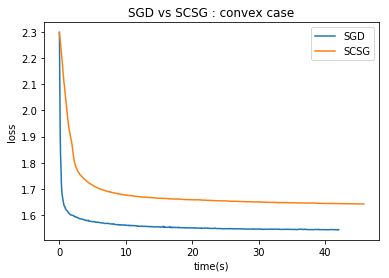

In [9]:
plt.plot(df1.duration, df1.loss)
plt.plot(df2.duration, df2.loss)
plt.title("SGD vs SCSG : convex case")
plt.legend(["SGD", "SCSG"])
plt.xlabel("time(s)")
plt.ylabel("loss")

> As we can see, in our impelmentation, the SCSG algorithm fails to outperform the classical SGD. This result is different from the one in the base paper. Nevertheless, let's recall that we only consider the fixed batch size scheme and this is not the best one for the SCSG algorithm.

# 2. The non-convex case

### 2.1. Non convex case :  SGD algorithm

In [ ]:
sgd2 = SGD(lr = 0.5, batch = 50, epochs = 30)
sgd2.archi = [28*28, 256, 128, 10] # Three layers perceptron ==> non convex objective due to function composition

sgd2.fit(x_train, y_train, x_test, y_test)

Epoch: 1 cost = 1.71529 acuracy:  0.7458


### 2.2. Non convex case :  SCSG algorithm

In [ ]:
scsg2 = SCSG( epochs = 500)
scsg2.archi = [28*28, 256, 128, 10] # Three layers perceptron ==> non convex objective due to function composition

scsg2.fit(x_train, y_train, x_test, y_test, eta = 0.5, B= 512, b = 10)

In [ ]:
df3 = pd.DataFrame({"loss": sgd2.losses, "time": sgd2.times, "accuray": sgd2.accuracies})
df3["duration"] = df3.time - df3.time.iloc[0]

df4 = pd.DataFrame({"loss": scsg2.losses, "time": scsg2.times, "accuray": scsg2.accuracies})
df4["duration"] = df4.time - df4.time.iloc[0]

df3.shape, df4.shape

In [ ]:
plt.plot(df1.duration, df1.loss)
plt.plot(df2.duration, df2.loss)
plt.title("SGD vs SCSG : non-convex case")
plt.legend(["SGD", "SCSG"])
plt.xlabel("time(s)")
plt.ylabel("loss")

> Here again, the SCSG algorithm fails to outperform the classical SGD. This is quite surprising as it is different form from the conclusion of Lihua & Al. 

# Conclusion

> This project is very educational. Not only did it allow us to deepen our knowledge of Tensorflow and its automatic differentiation framework but also to implement new but very promising algorithm : the stochastically controlled stochastic gradient (SCSG) algorithm.

> This algorithm is interresting as it makes less than one pass over the dataset at each epoch  and still, at least theoretically, guarantees nice convergence properties.

> Even though we wasn't able to recover the whole results of Lihua & Al., our results show that the newly proposed algorithm performs not so bad and can, likely, give better results if correctly tuned.